In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data (replace with your dataset)
# X = df.drop(columns=['target_column'])
# y = df['target_column']

# For demonstration, we'll use a synthetic dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f'Ridge Regression MSE: {ridge_mse}')

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f'Lasso Regression MSE: {lasso_mse}')


Ridge Regression MSE: 4.114050771972589
Lasso Regression MSE: 0.06362439921332456


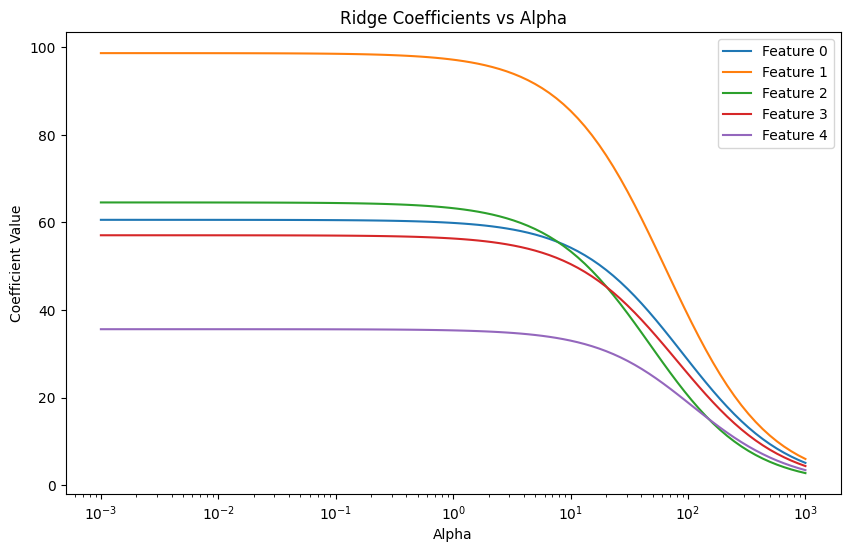

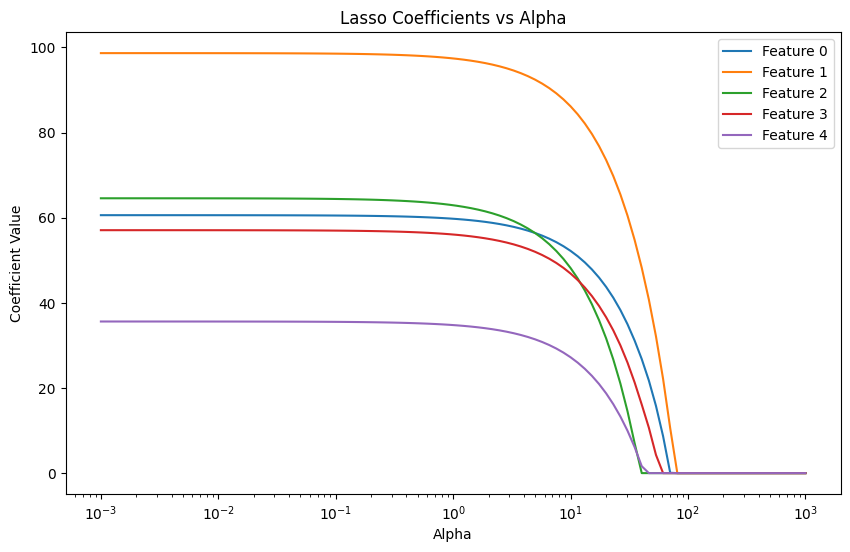

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Assume X_train, X_test, y_train, y_test already defined

# Define range of alphas
alphas = np.logspace(-3, 3, 100)

ridge_coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

ridge_coefs = np.array(ridge_coefs)

# Plot Ridge coefficients vs alpha
plt.figure(figsize=(10,6))
for i in range(ridge_coefs.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients vs Alpha')
plt.legend()
plt.show()

# Lasso Coefficients vs Alpha
lasso_coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(10,6))
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas, lasso_coefs[:, i], label=f'Feature {i}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs Alpha')
plt.legend()
plt.show()
